do a classical Monte Carlo simulation to see if atoms remain trapped in a given bottle beam potential

In [27]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.io import loadmat

import sys, os
sys.path.append('..\\')
sys.path.append('..\\utilities')

# local imports
from simfuncs import *
from rbconsts import *
from physconsts import *
from amophys import *

In [36]:
f = h5py.File('C:\\Users\\prest\\Downloads\\E_3d_after_propagation_SR.mat')
print([f[key] for key in list(f.keys())])

[<HDF5 group "/#refs#" (12 members)>, <HDF5 group "/#subsystem#" (1 members)>, <HDF5 dataset "E_3d_array_after_propagation": shape (25, 5556, 5556), type "|V16">, <HDF5 dataset "N": shape (1, 1), type "<f8">, <HDF5 dataset "x_list": shape (5556, 1), type "<f8">, <HDF5 dataset "y_list": shape (5556, 1), type "<f8">, <HDF5 dataset "z_distance_list": shape (1, 6), type "<u4">, <HDF5 dataset "z_num": shape (1, 1), type "<f8">]


In [50]:
zdim,xdim,ydim = f['E_3d_array_after_propagation'].shape

In [51]:
Ez_dset = f['E_3d_array_after_propagation'][:,xdim//2,ydim//2]

In [52]:
Ez = array([Er + 1j*Ei for Er,Ei in Ez_dset])

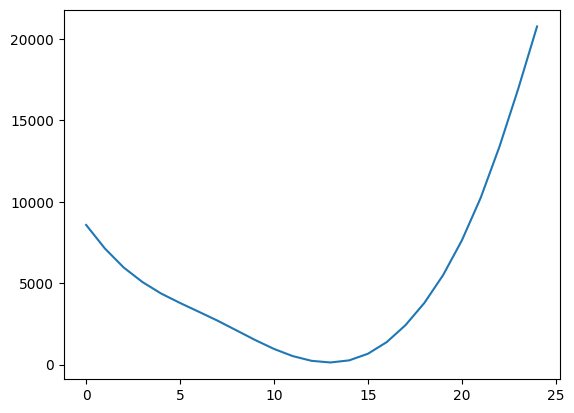

In [53]:
plt.plot(abs(Ez)**2)

In [79]:
xstart = xdim//2-40
xstop = xdim//2+40
Exz_dset = f['E_3d_array_after_propagation'][:,ydim//2,xstart:xstop]

In [80]:
Exz = array([[Er + 1j*Ei for Er,Ei in Erow] for Erow in Exz_dset])

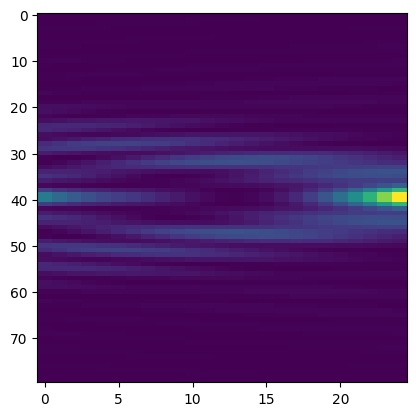

In [81]:
fig,ax = plt.subplots()
ax.imshow(abs(Exz.transpose())**2)
ax.set_aspect(Exz.shape[0]/Exz.shape[1])

In [82]:
Exy_dset = f['E_3d_array_after_propagation'][13,xstart:xstop,xstart:xstop]
Exy = array([[Er + 1j*Ei for Er,Ei in Erow] for Erow in Exy_dset])

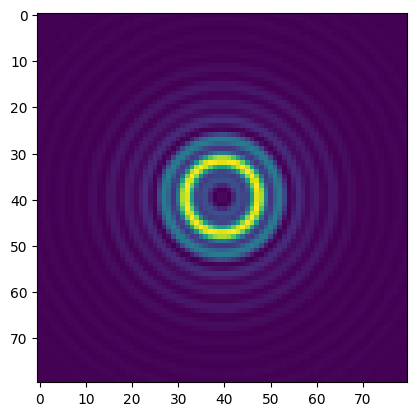

In [84]:
fig,ax = plt.subplots()
ax.imshow(abs(Exy.transpose())**2)